In [2]:
import sys
import face_alignment
sys.path.append('..')
from align_faces import align_face
%load_ext autoreload
%autoreload 2

100%|████████████████████████████████████████████████████████████████████████████████| 3/3 [00:05<00:00,  1.85s/it]

[1, 1, 3]


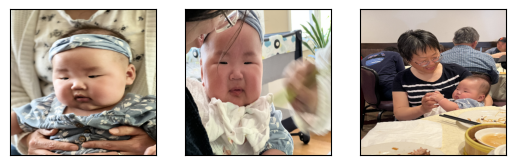

In [3]:
import tqdm
import glob
import torch
import numpy as np
import torchvision
from torchvision.utils import draw_keypoints
from torchvision.io import read_image
from torchvision.io import ImageReadMode
import torchvision.transforms.functional as F
from lib.utils import show_imgs

def get_key_points(im, device='cuda'):
    fa = face_alignment.FaceAlignment(face_alignment.LandmarksType.TWO_D, 
                                    device=device)
    return fa.get_landmarks(im, return_bboxes=True)

imps = [
    '/Users/jiaxuanwang/Downloads/lua training set/lua_png/IMG_2730.png',
    '/Users/jiaxuanwang/Downloads/lua training set/lua_png/IMG_2750.png',
    '/Users/jiaxuanwang/Downloads/lua training set/lua_png/IMG_0131.png',
]
# imps = glob.glob('/Users/jiaxuanwang/Downloads/lua training set/lua_png/*.png')
imgs = []
lmks = []
bboxes = []
for imp in tqdm.tqdm(imps):
    im = torchvision.transforms.Resize((450, 450))(
        read_image(imp, ImageReadMode.RGB))
    lmk, lmk_socres, bbox = get_key_points(
        im if im.shape[2] == 3 else im.permute((1,2,0)),
        device='mps')
    lmks.append(lmk)
    imgs.append(
        draw_keypoints(
          im,
          torch.from_numpy(np.array(lmk)), colors="blue", radius=0)
      )
    bboxes.append(bbox)

show_imgs(imgs)
print([len(lmk) for lmk in lmks])

100%|███████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 919.40it/s]


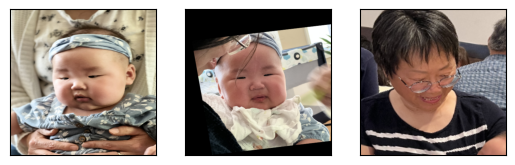

In [4]:
aligned_faces = []
for i, img in enumerate(tqdm.tqdm(imgs)):
    if i == 0:
        aligned_faces.append(img)
    else:
        aligned_faces.append(align_face(img, lmks[i][0], lmks[0][0]))

cadence = 4
for s in range(len(aligned_faces))[::cadence]:
    show_imgs(aligned_faces[s:s+cadence])

In [5]:
bbox

[array([161.97634602, 110.0635097 , 249.37120533, 200.17390704,
          0.99963939]),
 array([421.6135084 ,  95.63709092, 449.0566408 , 128.58174348,
          0.99907589]),
 array([287.4501175 , 197.56260407, 367.8284668 , 294.85043061,
          0.97554338])]

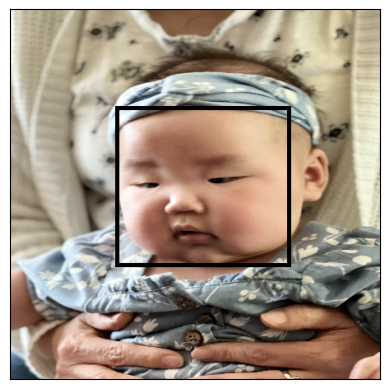

In [6]:
from torchvision.utils import draw_bounding_boxes
img_idx = 0
show_imgs(
    draw_bounding_boxes(imgs[img_idx], 
                        torch.from_numpy(np.array(
                            list(map(lambda b: b[:4], bboxes[img_idx]))
                        )), width=5)
)

128 118 341 313


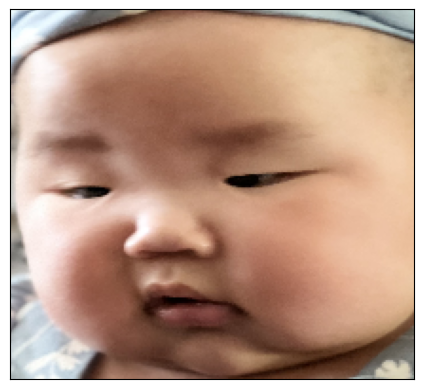

In [7]:
a,b,c,d = list(map(int, bboxes[0][0][:4]))
print(a, b, c, d)
show_imgs(imgs[0][:,b:d, a:c])

In [10]:
from deepface import DeepFace
from lib.utils import save_torch_image_tempfile

DeepFace.verify(img1_path = save_torch_image_tempfile(imgs[0], [:,b:d, a:c]), 
                img2_path = save_torch_image_tempfile(imgs[0]))

ValueError: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.